In [130]:
%matplotlib inline

import cv2
from matplotlib import pyplot as plt
import numpy as np
import random as rng
rng.seed(12345)

def imshow(img,size=(10,10)):
    fig, ax = plt.subplots(figsize=size) 
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    ax.imshow(img)
    ax.axis('off') 
    return plt.show()

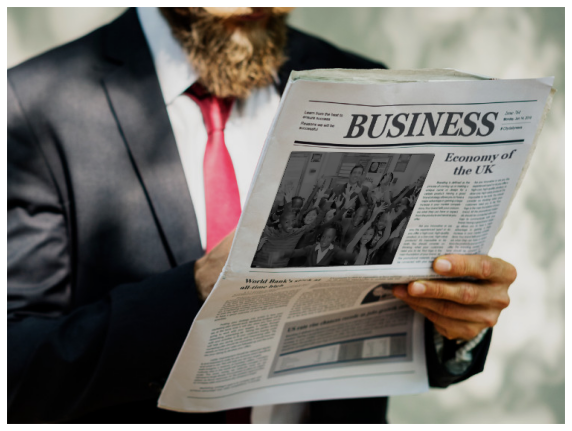

In [202]:
# Read source image.
im_src = cv2.imread('office.jpg')
im_src = cv2.cvtColor(im_src,cv2.COLOR_BGR2GRAY)


# Read destination image newspaper
im_dst = cv2.imread('news.jpg')


size = im_src.shape
   
# Create a vector of source points.
pts_src = np.array([[0,0],
                        [size[1] - 1, 0],
                        [size[1] - 1, size[0] -1],
                        [0, size[0] - 1 ]
                        ],dtype=float
                       )

#points for replacing
# pts_dst = np.array([[382., 197.],
#  				[574., 199.],
#  				[515., 344.],
#  				[329., 350.]])

    

pts_dst = np.array([[383., 194.],
 				[574., 198.],
 				[516., 344.],
 				[328., 349.]])
    
    
# Calculate Homography between source and destination points
h, status = cv2.findHomography(pts_src, pts_dst)
    
# Warp source image
im_temp = cv2.warpPerspective(im_src, h, (im_dst.shape[1],im_dst.shape[0]))

# Black out polygonal area in destination image.
cv2.fillConvexPoly(im_dst, pts_dst.astype(int), 0, 16)

    
# Add warped source image to destination image.
# im_temp = cv2.blur(im_temp,(1,1))
im_temp = cv2.bilateralFilter(im_temp,1,25,20)
im_temp = cv2.cvtColor(im_temp,cv2.COLOR_GRAY2BGR)
# im_dst = im_dst + im_temp

im_dst = cv2.addWeighted(im_dst,0.9,im_temp,0.4,0)

imshow(im_dst,(10,10))
# imshow(im_temp)